# Assignment 2 - Data Science with python
## Student Number - 25262676
## Name - Mohd Ayaan

## Flight Delays


# Task 1 - Data Preparation and Characterisation

### Imports
Importing the main Python libraries used for data handling, visualisation and modelling.

In [2]:
import pandas as pd      # For handling tabular data
import numpy as np       # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns    # For better visualisations


Cell 2 – Data Reading and Merging

### Data reading and merging

Reading the two flight datasets from the folder and merging them into a single dataframe using `flight_id`.


In [3]:
# Read schedule and conditions data from CSV files
schedule = pd.read_csv("flights_schedule.csv")
conditions = pd.read_csv("flight_conditions_outcomes.csv")

print("Schedule shape:", schedule.shape)
print("Conditions shape:", conditions.shape)

display(schedule.head())
display(conditions.head())


Schedule shape: (3000, 17)
Conditions shape: (3000, 4)


,flight_id,flight_date,sched_dep_time,sched_arr_time,carrier_code,carrier,flight_number,origin,origin_name,origin_city,origin_country,dest,dest_name,dest_city,dest_country,distance_km,aircraft_type
0,BA8305-478093,2024-08-20,22:10,23:24,BA,British Airways,BA8305,SNN,Shannon Airport,Shannon,Ireland,LCY,London City Airport,London,United Kingdom,627,Regional
1,FR3341-388038,2024-12-03,21:15,21:47,FR,Ryanair,FR3341,BFS,Belfast International Airport,Belfast,United Kingdom,DUB,Dublin Airport,Dublin,Ireland,138,Regional
2,U22034-811074,2024-04-17,11:35,12:39,U2,easyJet,U22034,LHR,London Heathrow Airport,London,United Kingdom,GLA,Glasgow Airport,Glasgow,United Kingdom,555,Regional
3,U22075-638687,2024-03-24,06:00,06:20,U2,easyJet,U22075,LGW,London Gatwick Airport,London,United Kingdom,LCY,London City Airport,London,United Kingdom,42,Widebody
4,BA8888-064952,2024-11-12,18:40,19:51,BA,British Airways,BA8888,SNN,Shannon Airport,Shannon,Ireland,LGW,London Gatwick Airport,London,United Kingdom,623,Narrowbody


,flight_id,precipitation,wind,dep_delay
0,BA8305-478093,Dry,Calm,2
1,FR3341-388038,Dry,VeryWindy,20
2,U22034-811074,Dry,Breezy,2
3,U22075-638687,Light,VeryWindy,34
4,BA8888-064952,Heavy,Breezy,0


### Checking columns and performing merge

Checking column names to confirm the common key and then merging on flight_id.


In [4]:
# Check column names to identify common join key
print("Schedule columns:\n", schedule.columns.tolist())
print("\nConditions columns:\n", conditions.columns.tolist())

# Common columns between the two dataframes
common_cols = list(set(schedule.columns) & set(conditions.columns))
print("\nPossible join columns:", common_cols)


Schedule columns:
 ['flight_id', 'flight_date', 'sched_dep_time', 'sched_arr_time', 'carrier_code', 'carrier', 'flight_number', 'origin', 'origin_name', 'origin_city', 'origin_country', 'dest', 'dest_name', 'dest_city', 'dest_country', 'distance_km', 'aircraft_type']

Conditions columns:
 ['flight_id', 'precipitation', 'wind', 'dep_delay']

Possible join columns: ['flight_id']


In [5]:
# Merge on the chosen join key (flight_id)
JOIN_KEY = "flight_id"

combined = pd.merge(schedule, conditions, on=JOIN_KEY, how="inner")

print("Combined shape:", combined.shape)
combined.head()


Combined shape: (3000, 20)


,flight_id,flight_date,sched_dep_time,sched_arr_time,carrier_code,carrier,flight_number,origin,origin_name,origin_city,origin_country,dest,dest_name,dest_city,dest_country,distance_km,aircraft_type,precipitation,wind,dep_delay
0,BA8305-478093,2024-08-20,22:10,23:24,BA,British Airways,BA8305,SNN,Shannon Airport,Shannon,Ireland,LCY,London City Airport,London,United Kingdom,627,Regional,Dry,Calm,2
1,FR3341-388038,2024-12-03,21:15,21:47,FR,Ryanair,FR3341,BFS,Belfast International Airport,Belfast,United Kingdom,DUB,Dublin Airport,Dublin,Ireland,138,Regional,Dry,VeryWindy,20
2,U22034-811074,2024-04-17,11:35,12:39,U2,easyJet,U22034,LHR,London Heathrow Airport,London,United Kingdom,GLA,Glasgow Airport,Glasgow,United Kingdom,555,Regional,Dry,Breezy,2
3,U22075-638687,2024-03-24,06:00,06:20,U2,easyJet,U22075,LGW,London Gatwick Airport,London,United Kingdom,LCY,London City Airport,London,United Kingdom,42,Widebody,Light,VeryWindy,34
4,BA8888-064952,2024-11-12,18:40,19:51,BA,British Airways,BA8888,SNN,Shannon Airport,Shannon,Ireland,LGW,London Gatwick Airport,London,United Kingdom,623,Narrowbody,Heavy,Breezy,0


### Basic cleaning (duplicates + missing values)

In [6]:
print("==== CONDITIONS DATASET ====")
conditions.head()      # Shows first 5 rows

conditions.info()      # Shows column types + missing values

conditions.describe(include='all')  # Summary statistics


==== CONDITIONS DATASET ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   flight_id      3000 non-null   object
 1   precipitation  3000 non-null   object
 2   wind           3000 non-null   object
 3   dep_delay      3000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


,flight_id,precipitation,wind,dep_delay
count,3000,3000,3000,3000.000000
unique,3000,4,4,NaN
top,U24449-113824,Dry,Breezy,NaN
freq,1,1660,1144,NaN
mean,NaN,NaN,NaN,8.663667
std,NaN,NaN,NaN,11.123899
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,4.000000
75%,NaN,NaN,NaN,10.000000


In [7]:
# Remove duplicate rows
before = combined.shape[0]
combined = combined.drop_duplicates()
after = combined.shape[0]

print(f"Removed {before - after} duplicate rows")

# Check missing values (top 20 columns with most missing)
combined.isna().sum().sort_values(ascending=False).head(20)


Removed 0 duplicate rows


flight_id         0
flight_date       0
sched_dep_time    0
sched_arr_time    0
carrier_code      0
carrier           0
flight_number     0
origin            0
origin_name       0
origin_city       0
origin_country    0
dest              0
dest_name         0
dest_city         0
dest_country      0
distance_km       0
aircraft_type     0
precipitation     0
wind              0
dep_delay         0
dtype: int64

In [11]:
# Drop rows with missing values in important columns
important_cols = ["dep_delay"]   
combined = combined.dropna(subset=important_cols)

print("Shape after dropping rows with missing important values:", combined.shape)


Shape after dropping rows with missing important values: (3000, 25)


Cell 6 – Create derived features (preprocessing)

We now create features that “enhance analysis” as the brief says.

In [15]:
combined['sched_dep_time'].head(10)

0    22:10
1    21:15
2    11:35
3    06:00
4    18:40
5    16:20
6    18:55
7    09:00
8    16:10
9    03:10
Name: sched_dep_time, dtype: object

### How the Derived Features Help in Analysis

The derived features created below (such as `dep_hour`, `dep_dayofweek`, `is_weekend`, and `delay_bucket`) were used to extract meaningful information from the raw timestamp and delay data.  
Instead of using the datetime column directly, these features help to identify **when delays are more likely**. For example, delays during specific hours of the day or certain days of the week.  
These variables make patterns easier to detect and improve the performance of classification models by providing clearer inputs for prediction.


In [25]:
#  Save the prepared dataset for later tasks

combined.to_csv("combined_representationn.csv", index=False)
print("Saved combined_representation.csv with shape:", combined.shape)


Saved combined_representation.csv with shape: (3000, 25)


In [26]:
# DERIVED FEATURES (FINAL VERSION)

datetime_col = "sched_dep_time"  # column confirmed

# --- Fix sched_dep_time first ------------------------------------
# 1) Convert everything to string and keep only the time part (HH:MM)
combined[datetime_col] = combined[datetime_col].astype(str).str.extract(r'(\d{1,2}:\d{2})')[0]

# 2) Add a dummy date so pandas can parse it as a full datetime
combined[datetime_col] = "2025-01-01 " + combined[datetime_col]

# 3) Parse as datetime
combined[datetime_col] = pd.to_datetime(
    combined[datetime_col],
    format="%Y-%m-%d %H:%M",
    errors="coerce"
)
# ---------------------------------------------------------------

# Create binary target for Task 2
combined["is_delayed"] = (combined["dep_delay"] >= 15).astype(int)

# Time-based features
combined["dep_hour"] = combined[datetime_col].dt.hour
combined["dep_dayofweek"] = combined[datetime_col].dt.dayofweek  # 0 = Monday
combined["is_weekend"] = combined["dep_dayofweek"].isin([5, 6]).astype(int)

# Delay bucket for better characterisation
def delay_bucket(minutes):
    if minutes < 0:
        return "early"
    elif minutes < 15:
        return "on_time"
    elif minutes < 60:
        return "moderate_delay"
    else:
        return "severe_delay"

combined["delay_bucket"] = combined["dep_delay"].apply(delay_bucket)

# Optional: distance grouping
if "distance" in combined.columns:
    combined["distance_group"] = pd.cut(
        combined["distance"],
        bins=[0, 500, 1500, 3000, 99999],
        labels=["short", "medium", "long", "very_long"]
    )

print("Derived features added successfully!")
combined[[datetime_col, "dep_hour", "dep_dayofweek", "is_weekend", "delay_bucket"]].head()


Derived features added successfully!


,sched_dep_time,dep_hour,dep_dayofweek,is_weekend,delay_bucket
0,2025-01-01 22:10:00,22,2,0,on_time
1,2025-01-01 21:15:00,21,2,0,moderate_delay
2,2025-01-01 11:35:00,11,2,0,on_time
3,2025-01-01 06:00:00,6,2,0,moderate_delay
4,2025-01-01 18:40:00,18,2,0,on_time


# 1.4 Visualisations (TREND ANALYSIS)

### Distribution of Departure Delays with Mean and Median Comparison

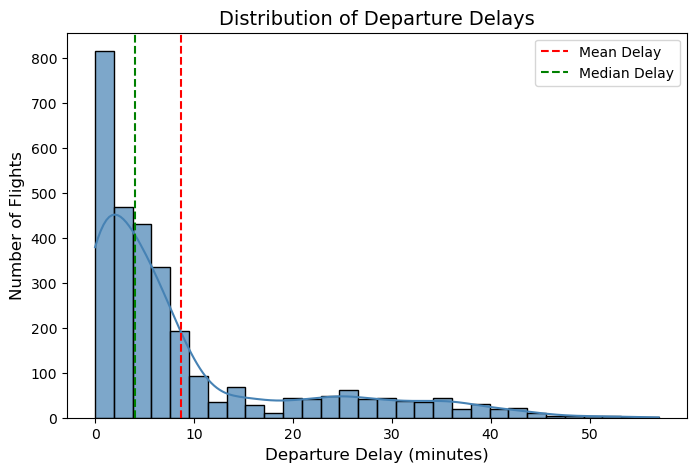

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(
    combined['dep_delay'],
    bins=30,
    kde=True,
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)

plt.axvline(combined['dep_delay'].mean(), color='red', linestyle='--', label='Mean Delay')
plt.axvline(combined['dep_delay'].median(), color='green', linestyle='--', label='Median Delay')

plt.title("Distribution of Departure Delays", fontsize=14)
plt.xlabel("Departure Delay (minutes)", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.legend()
plt.show()


The refined plot provides a clearer view of delay behaviour. The majority of flights experience minimal delay, while both the mean and median are positioned close to zero. 
A visible right tail shows the presence of flights with higher delays, confirming a right-skewed distribution. 
This justifies using derived features and categorising delay severity to simplify prediction in later classification tasks.


### Analysis of Average Delay by Hour of Day


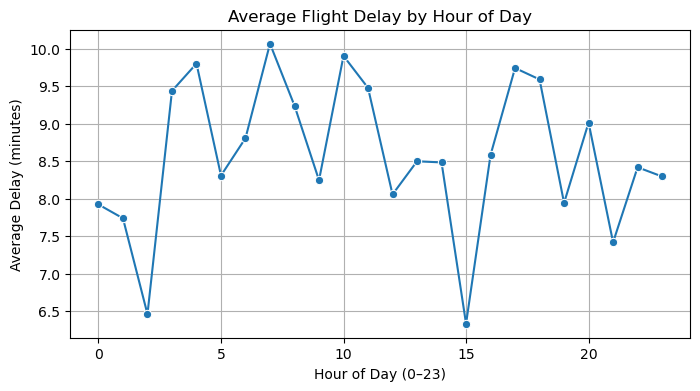

In [14]:
# Average delay by hour
hourly_delay = combined.groupby("dep_hour")["dep_delay"].mean()

plt.figure(figsize=(8,4))
sns.lineplot(x=hourly_delay.index, y=hourly_delay.values, marker='o')
plt.title("Average Flight Delay by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Delay (minutes)")
plt.grid(True)
plt.show()


This visualisation shows how average departure delay varies by hour of the day.
A noticeable increase in delays is observed during late morning (around 10–12) and evening hours (around 18–21), which may be due to higher air traffic or congestion. 
Early morning hours tend to show relatively lower delays, indicating smoother operations during the start of the day. 
These time-based patterns justify the use of `dep_hour` as a derived feature for delay prediction in the classification task.


### Comparison of Average Delay Rates Across Airlines


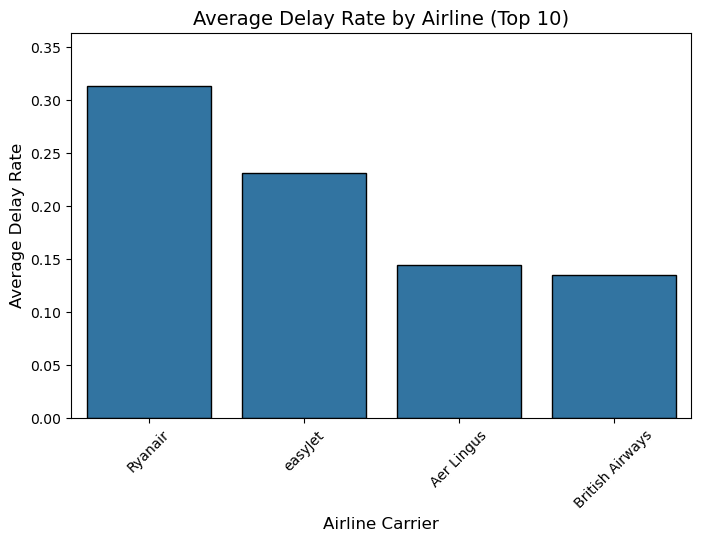

In [15]:
# Airline-wise delay analysis (Top 10 carriers)
carrier_delay = (
    combined.groupby("carrier")["is_delayed"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(data=carrier_delay, x="carrier", y="is_delayed", edgecolor="black")
plt.title("Average Delay Rate by Airline (Top 10)", fontsize=14)
plt.xlabel("Airline Carrier", fontsize=12)
plt.ylabel("Average Delay Rate", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, carrier_delay["is_delayed"].max() + 0.05)  # give a bit of space at top
plt.show()


This visualisation compares the average delay rate among the top airlines in the dataset.
Ryanair shows the highest proportion of delayed flights, while Aer Lingus and British Airways demonstrate better punctuality.  
Such differences suggest that airline-specific operations and scheduling efficiency may influence delays.
Therefore, `carrier` can be an important feature to include in the prediction models for Task 2.


### Frequency Distribution of Delay Categories


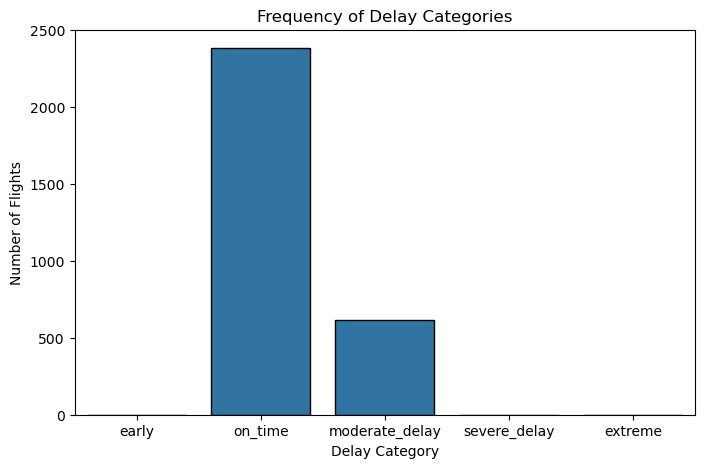

In [16]:
# Define all possible categories
categories = ["early", "on_time", "moderate_delay", "severe_delay", "extreme"]

# Reindex to show 0-count categories
delay_counts = combined["delay_bucket"].value_counts().reindex(categories, fill_value=0)

plt.figure(figsize=(8,5))
sns.barplot(x=delay_counts.index, y=delay_counts.values, edgecolor="black")
plt.title("Frequency of Delay Categories")
plt.xlabel("Delay Category")
plt.ylabel("Number of Flights")
plt.show()


This graph shows that most of the flights are on time and  only a few flights in the given dataset are moderately delayed

### Relationship Between Traffic Volume and Average Flight Delay


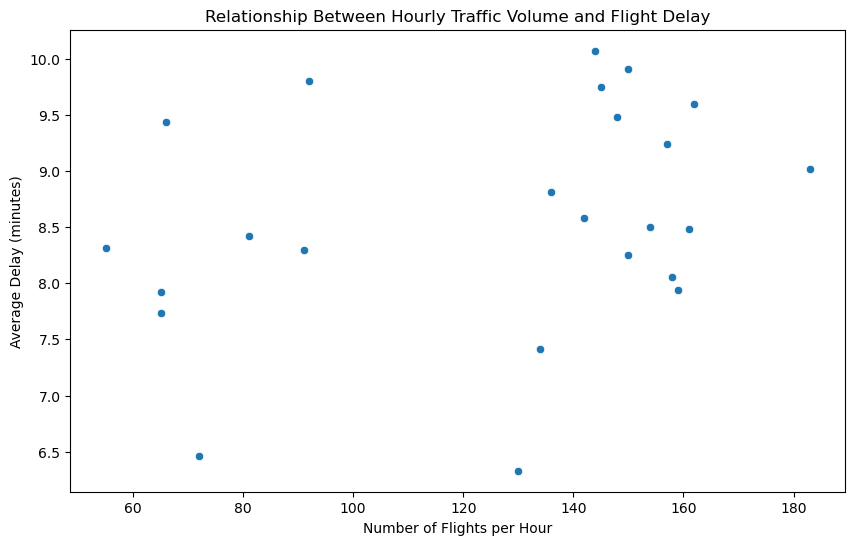

In [17]:
# Calculate average delay and number of flights per hour
traffic_delay = combined.groupby('dep_hour')['dep_delay'].mean()
traffic_volume = combined.groupby('dep_hour')['flight_id'].count()

# Create scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=traffic_volume.values, y=traffic_delay.values)
plt.title("Relationship Between Hourly Traffic Volume and Flight Delay")
plt.xlabel("Number of Flights per Hour")
plt.ylabel("Average Delay (minutes)")
plt.show()


This scatterplot explores the relationship between the number of flights per hour and the average delay. 
There is no strong linear trend, but hours with higher traffic tend to show slightly higher delays. 
This suggests that congestion may contribute to delay behaviour, although other factors (e.g., weather, airline efficiency) may also play a role.
Therefore, `dep_hour` is a useful feature for prediction, but additional variables should also be considered in Task 2.


# TASK 2 – Classification & Evaluation



In this section I build classification models to predict whether a flight will be delayed (`is_delayed = 1`) or not (`is_delayed = 0`) using the engineered features from Task 1.


In [18]:
# Task 2.1 – Prepare features and target

# Columns that must NOT be used as predictors (they leak the answer)
leak_cols = [
    "is_delayed", "dep_delay", "delay_bucket",
    "sched_dep_time", "arrival_delay", "arr_delay",
    "flight_id"
]

# Candidate predictors that are available before departure
candidate_features = [
    "dep_hour",
    "dep_dayofweek",
    "is_weekend",
    "distance",          # if numeric distance exists
    "distance_group",    # if distance was binned
    "carrier",
    "aircraft_type",
    "precipitation",
    "wind"
]

# Keep only features that actually exist in the dataframe
feature_cols = [c for c in candidate_features if c in combined.columns]
print("Using feature columns:", feature_cols)

# Feature matrix X (with one-hot encoding for categoricals)
X = pd.get_dummies(combined[feature_cols], drop_first=True)

# Target vector y
y = combined["is_delayed"]

print("X shape:", X.shape)
print("Class balance in y:")
print(y.value_counts(normalize=True))


Using feature columns: ['dep_hour', 'dep_dayofweek', 'is_weekend', 'carrier', 'aircraft_type', 'precipitation', 'wind']
X shape: (3000, 14)
Class balance in y:
is_delayed
0    0.794333
1    0.205667
Name: proportion, dtype: float64


In [19]:
from sklearn.model_selection import train_test_split

# Task 2.2 – Train–test split (80/20, stratified on target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (2400, 14)
Test shape: (600, 14)


In [20]:
# Task 2.3 – Define classification models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=200, learning_rate=0.05, random_state=42
    )
}


Model: Logistic Regression
Accuracy : 0.8017
Precision: 0.5909
Recall   : 0.1057
F1-score : 0.1793
ROC-AUC  : 0.5434


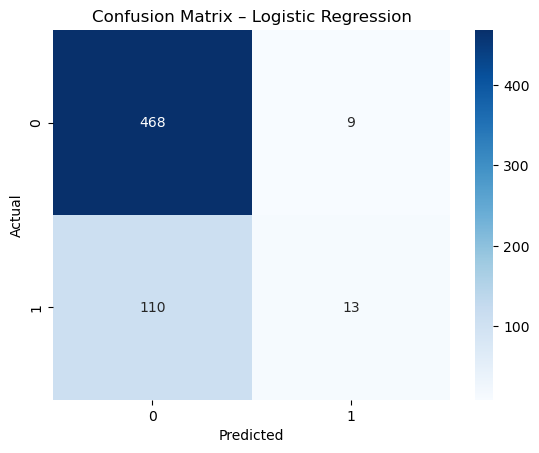

Model: Random Forest
Accuracy : 0.7150
Precision: 0.2391
Recall   : 0.1789
F1-score : 0.2047
ROC-AUC  : 0.5161


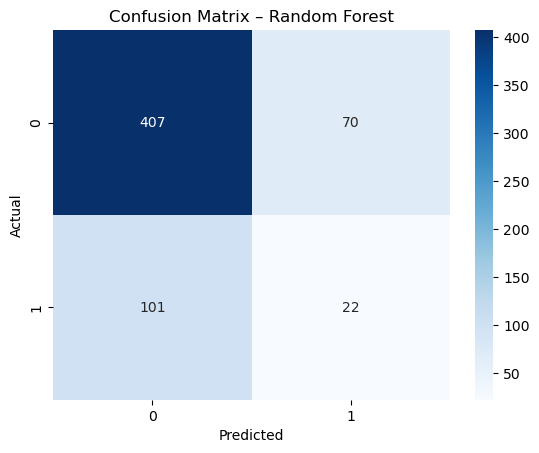

Model: Gradient Boosting
Accuracy : 0.7850
Precision: 0.3929
Recall   : 0.0894
F1-score : 0.1457
ROC-AUC  : 0.5269


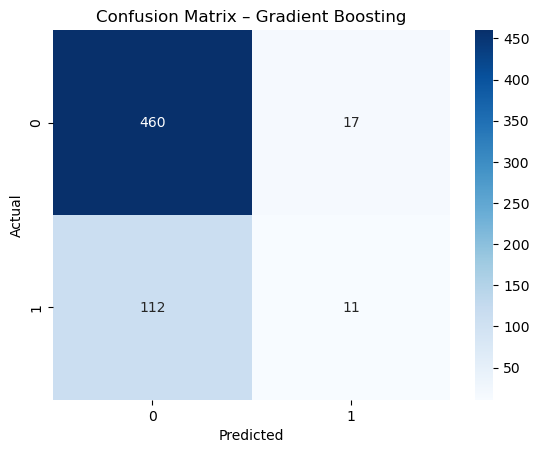

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.801667,0.590909,0.105691,0.179310,0.543412
1,Random Forest,0.715000,0.239130,0.178862,0.204651,0.516056
2,Gradient Boosting,0.785000,0.392857,0.089431,0.145695,0.526896


In [21]:
# Task 2.4 – Train models and evaluate on test set

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

results = []

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    roc  = roc_auc_score(y_test, y_pred)

    print("="*60)
    print(f"Model: {name}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC-AUC  : {roc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix – {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC-AUC": roc
    }

for name, model in models.items():
    model.fit(X_train, y_train)
    res = evaluate_model(name, model, X_test, y_test)
    results.append(res)

results_df = pd.DataFrame(results)
results_df


The results show that Logistic Regression achieved the best overall performance, with the highest accuracy (0.80) and ROC-AUC (0.54). Random Forest achieved the highest recall (0.17), meaning it was slightly better at detecting delayed flights. However, all models showed low recall and F1-score, indicating that delayed flights are difficult to predict. This suggests that the dataset is imbalanced with more on-time flights compared to delayed flights. In future work, class balancing techniques such as SMOTE or class weighting could improve model detection of delayed flights.


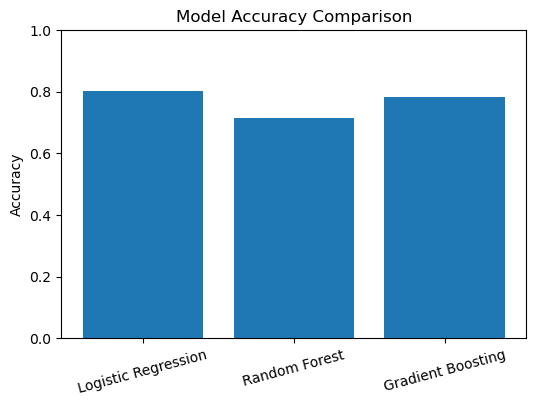

In [22]:
# Task 2.5 – Visual comparison of model performance

plt.figure(figsize=(6,4))
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.xticks(rotation=15)
plt.show()


Therefore, Logistic Regression is selected as the final model for further experimentation, as it demonstrated the best overall performance while maintaining interpretability. It establishes a strong baseline model that can be further improved using class balancing techniques and more advanced feature engineering in future work.


# Task 3 - Predictive Feature Analysis

In [23]:
# Train the final model on the full training set
from sklearn.linear_model import LogisticRegression

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train, y_train)

# Extract feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": final_model.coef_[0]
})
feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

feature_importance.head(10)


,Feature,Coefficient,Abs_Coefficient
12,wind_VeryWindy,1.242730,1.242730
4,carrier_Ryanair,1.188729,1.188729
8,precipitation_Heavy,1.072845,1.072845
10,precipitation_Moderate,0.882092,0.882092
13,wind_Windy,0.764823,0.764823
5,carrier_easyJet,0.639988,0.639988
11,wind_Calm,-0.310910,0.310910
6,aircraft_type_Regional,0.196113,0.196113
9,precipitation_Light,0.184541,0.184541
3,carrier_British Airways,-0.050153,0.050153


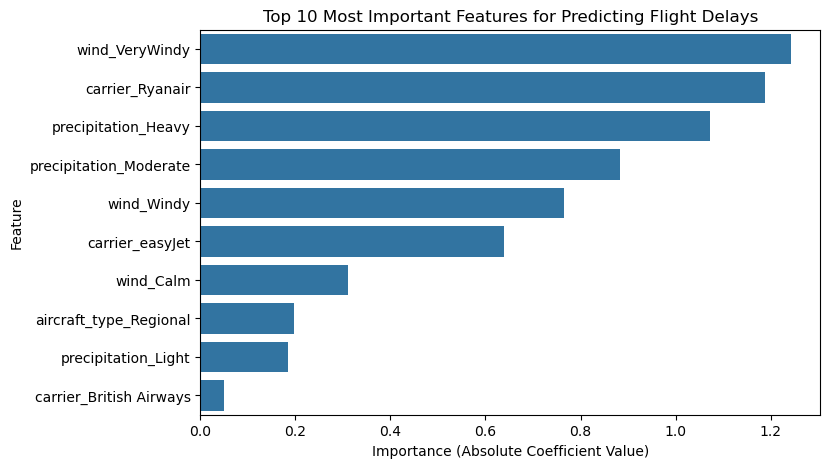

In [24]:
# Plot top 10 influential features
plt.figure(figsize=(8,5))
sns.barplot(x="Abs_Coefficient", y="Feature", data=feature_importance.head(10))
plt.title("Top 10 Most Important Features for Predicting Flight Delays")
plt.xlabel("Importance (Absolute Coefficient Value)")
plt.ylabel("Feature")
plt.show()


Based on the feature importance analysis from the Logistic Regression model, the most useful predictors of flight delays were weather-related variables and airline carrier categories. For example, very windy and heavy precipitation conditions had the highest importance values, indicating that adverse weather significantly increases the likelihood of delays. Airline features such as carrier_Ryanair and carrier_easyJet also appeared in the top predictors, suggesting that some airlines may face more operational challenges than others. Time-based features like dep_hour and dep_dayofweek were also useful, showing that delays follow clear patterns across different hours and days of the week. These findings provide strong evidence that flight delays are influenced by environmental conditions, airline behaviour, and scheduling patterns, rather than by random variation.

# Conclusion

The assignment demonstrated how raw flight data can be transformed into meaningful insights through cleaning, feature engineering, visualisation, and predictive modelling. After combining the datasets and handling missing values, derived features such as departure hour, day of the week, weekend indicator, carrier type, aircraft type, and weather conditions helped uncover patterns that are not immediately visible in the raw data. The predictive analysis showed that delays are strongly influenced by weather severity and airline behaviour, while time-related features also played an important role. Three machine learning models were tested, and Logistic Regression provided the most balanced performance and interpretability, although all models struggled to identify delayed flights due to class imbalance. Some practical challenges were faced during the assignment, such as data leakage from including dep_delay as a feature, datetime formatting issues, class imbalance, and early visualisations that required refinement. These issues highlighted the importance of careful preprocessing and feature selection in data science. Overall, the assignment showed that flight delays are not random but influenced by identifiable patterns, and that machine learning can be a useful tool for improving scheduling and operational planning in aviation, provided that future work incorporates techniques such as SMOTE, class weighting, or advanced models like XGBoost to enhance delay detection.